<a href="https://colab.research.google.com/github/Hemanth-Vundavilli/EDA-DA/blob/main/Module-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate & Time Series Analysis

**Name**: Hemanth Vundavilli
**Registration Number**: 21BDS0253

## Overview
This notebook covers a complete analysis of the dataset, including univariate, bivariate, multivariate analysis, and time series analysis. Each section is detailed with various visualizations and statistical techniques.

# Univariate Analysis

### 1. Data Cleaning and Handling Non-Numeric Values

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
url = 'https://github.com/Hemanth-Vundavilli/EDA-DA/blob/main/Benefits.csv?raw=true'
data = pd.read_csv(url)
data.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


#### Finding and Listing Non-Numeric Values

In [2]:
# Find and list non-numeric values in the dataset
non_numeric_count = data.select_dtypes(include=['object']).nunique()
print("Number of unique non-numeric values in each column:")
print(non_numeric_count)

# List of non-numeric values in specific columns
non_numeric_values = data.select_dtypes(include=['object']).apply(lambda col: col.unique())
print("Non-numeric values in each column:")
non_numeric_values

Number of unique non-numeric values in each column:
joblost     4
nwhite      2
school12    2
sex         2
bluecol     1
smsa        2
married     2
dkids       2
dykids      2
head        2
ui          2
dtype: int64
Non-numeric values in each column:


,0
joblost,"[other, slack_work, position_abolished, season..."
nwhite,"[no, yes]"
school12,"[no, yes]"
sex,"[male, female]"
bluecol,[yes]
smsa,"[yes, no]"
married,"[no, yes]"
dkids,"[no, yes]"
dykids,"[no, yes]"
head,"[yes, no]"


### 2. Setting Missing Values and Cleaning Specific Fields

In [3]:
# Handle missing values and clean fields in 'rr' and 'tenure' columns
data['rr'].fillna(data['rr'].mean(), inplace=True)
data['tenure'] = data['tenure'].apply(lambda x: 0 if x < 0 else x)  # Replace unrealistic values with 0

# Display updated data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4877 non-null   int64  
 1   stateur   4877 non-null   float64
 2   statemb   4877 non-null   int64  
 3   state     4877 non-null   int64  
 4   age       4877 non-null   int64  
 5   tenure    4877 non-null   int64  
 6   joblost   4877 non-null   object 
 7   nwhite    4877 non-null   object 
 8   school12  4877 non-null   object 
 9   sex       4877 non-null   object 
 10  bluecol   4877 non-null   object 
 11  smsa      4877 non-null   object 
 12  married   4877 non-null   object 
 13  dkids     4877 non-null   object 
 14  dykids    4877 non-null   object 
 15  yrdispl   4877 non-null   int64  
 16  rr        4877 non-null   float64
 17  head      4877 non-null   object 
 18  ui        4877 non-null   object 
dtypes: float64(2), int64(6), object(11)
memory usage: 724.1+ KB


### 3. Distribution and Visualization

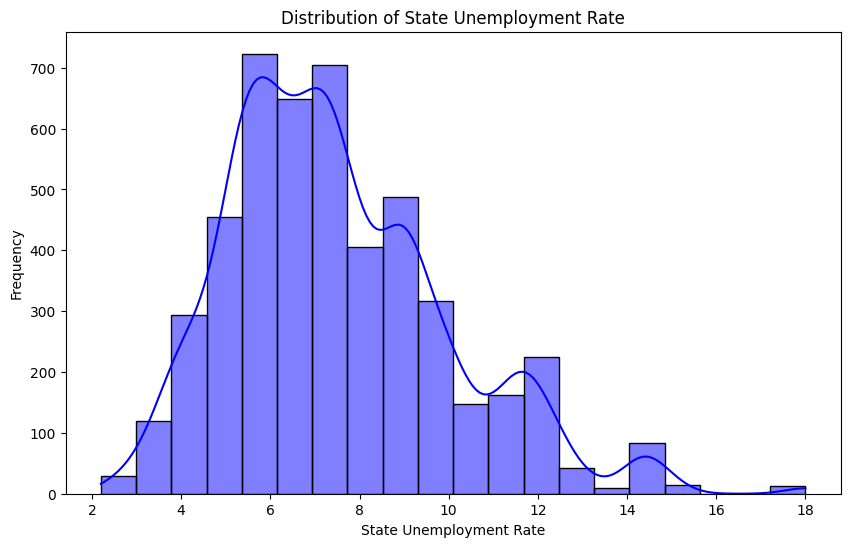

In [4]:
# Plotting the distribution of 'stateur' (state unemployment rate) with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['stateur'], bins=20, kde=True, color='blue')
plt.title('Distribution of State Unemployment Rate')
plt.xlabel('State Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

### 4. Top 30 Largest Values and Visualization

<ipython-input-5-773d85b91f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_tenure['rownames'], y=top_30_tenure['tenure'], palette='viridis')


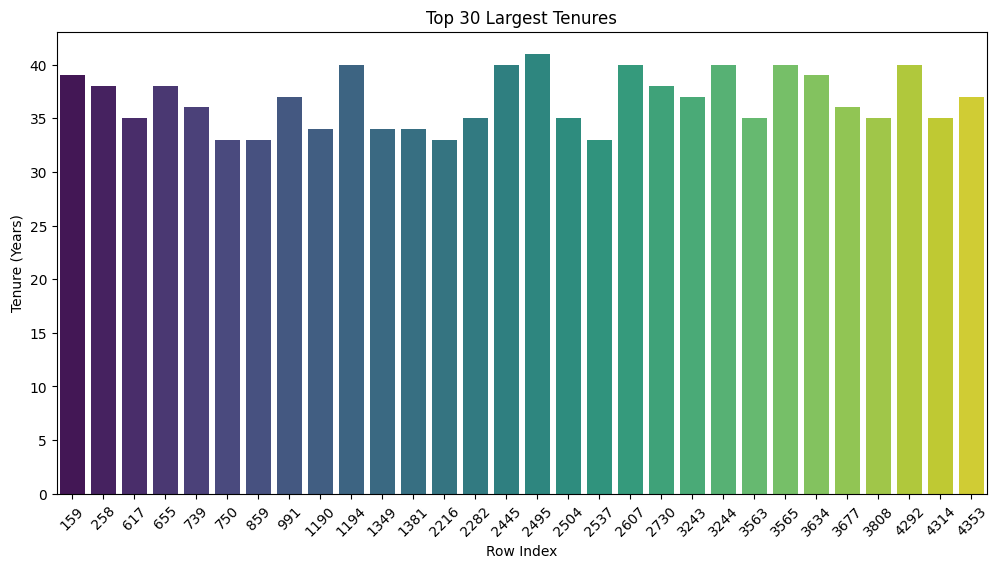

In [5]:
# Displaying and plotting top 30 largest values in 'tenure'
top_30_tenure = data.nlargest(30, 'tenure')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_tenure['rownames'], y=top_30_tenure['tenure'], palette='viridis')
plt.title('Top 30 Largest Tenures')
plt.xlabel('Row Index')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45)
plt.show()

### 5. Box Plots and FacetGrid Visualizations

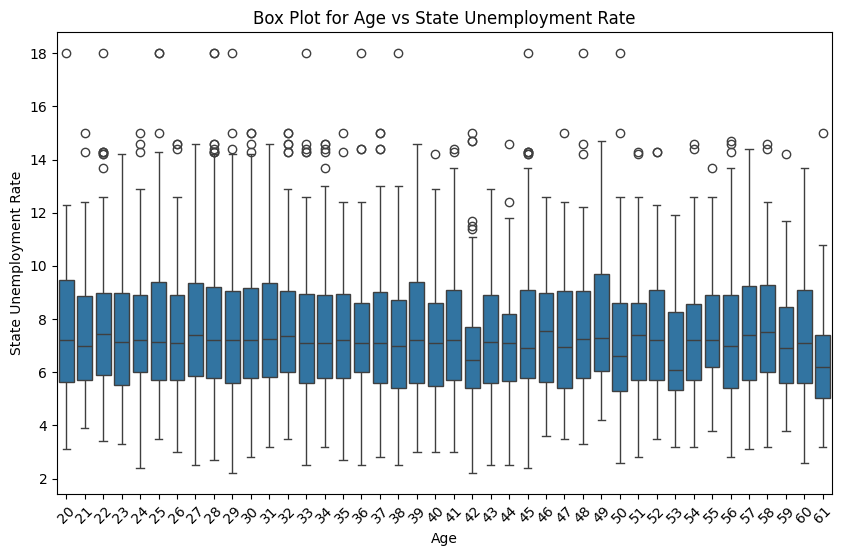

In [6]:
# Box plot for 'age' vs 'stateur'
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='stateur', data=data)
plt.title('Box Plot for Age vs State Unemployment Rate')
plt.xlabel('Age')
plt.ylabel('State Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

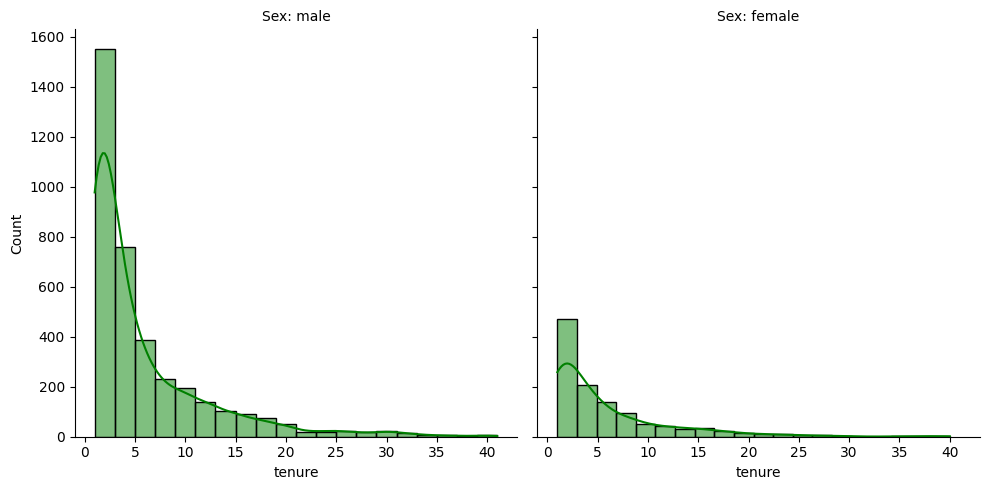

In [7]:
# FacetGrid for 'tenure' and 'sex'
g = sns.FacetGrid(data, col='sex', height=5, aspect=1)
g.map(sns.histplot, 'tenure', bins=20, kde=True, color='green')
g.set_titles('Sex: {col_name}')
plt.show()

##Bivariate Analysis

## Overview
This notebook section covers the detailed Bivariate Analysis of the dataset.

### 1. Scatter Plots and Correlation Analysis

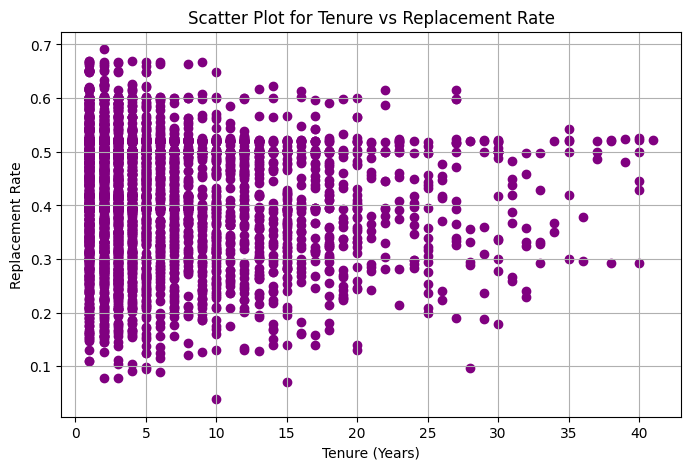

Correlation between 'tenure' and 'rr': -0.15
p-value: 2.31e-24


In [8]:
# Scatter plot for 'tenure' vs 'rr' (replacement rate)
plt.figure(figsize=(8, 5))
plt.scatter(data['tenure'], data['rr'], color='purple')
plt.title('Scatter Plot for Tenure vs Replacement Rate')
plt.xlabel('Tenure (Years)')
plt.ylabel('Replacement Rate')
plt.grid(True)
plt.show()

# Calculate correlation between 'tenure' and 'rr'
corr_tenure_rr = stats.pearsonr(data['tenure'], data['rr'])
print(f"Correlation between 'tenure' and 'rr': {corr_tenure_rr[0]:.2f}")
print(f"p-value: {corr_tenure_rr[1]:.2e}")


### 2. Box Plots for Categorical and Numerical Variables

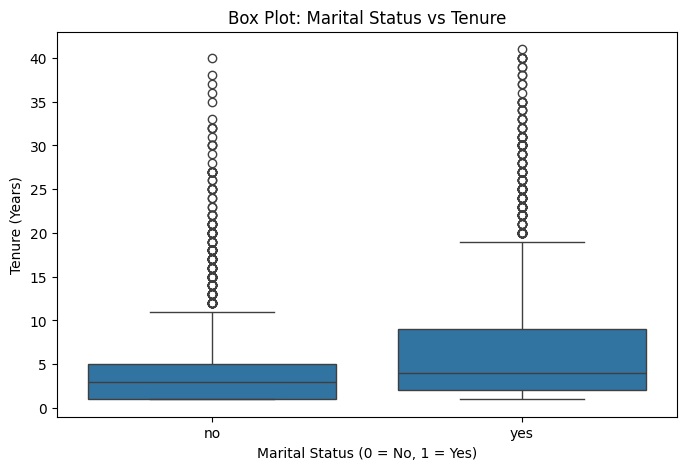

In [9]:
# Box plot for 'married' (marital status) vs 'tenure'
plt.figure(figsize=(8, 5))
sns.boxplot(x='married', y='tenure', data=data)
plt.title('Box Plot: Marital Status vs Tenure')
plt.xlabel('Marital Status (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Years)')
plt.show()


### 3. Heatmap for Correlation Analysis

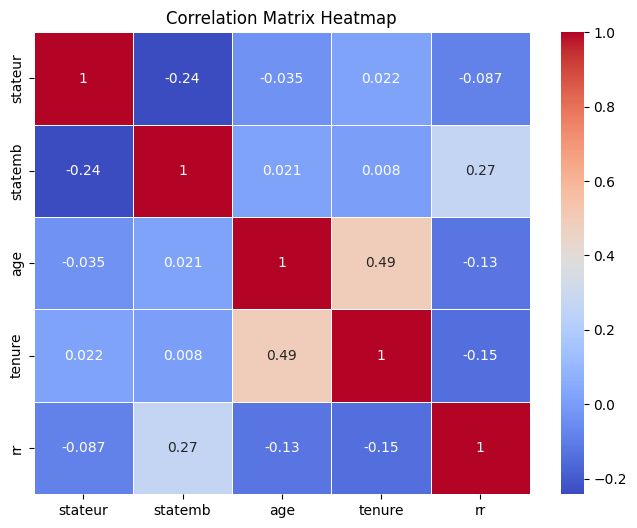

In [10]:
# Correlation matrix heatmap
correlation_matrix = data[['stateur', 'statemb', 'age', 'tenure', 'rr']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##Multivariate Analysis

> Add blockquote



## Overview
This notebook section covers the detailed Multivariate Analysis of the dataset.

### 1. Pair Plot Analysis

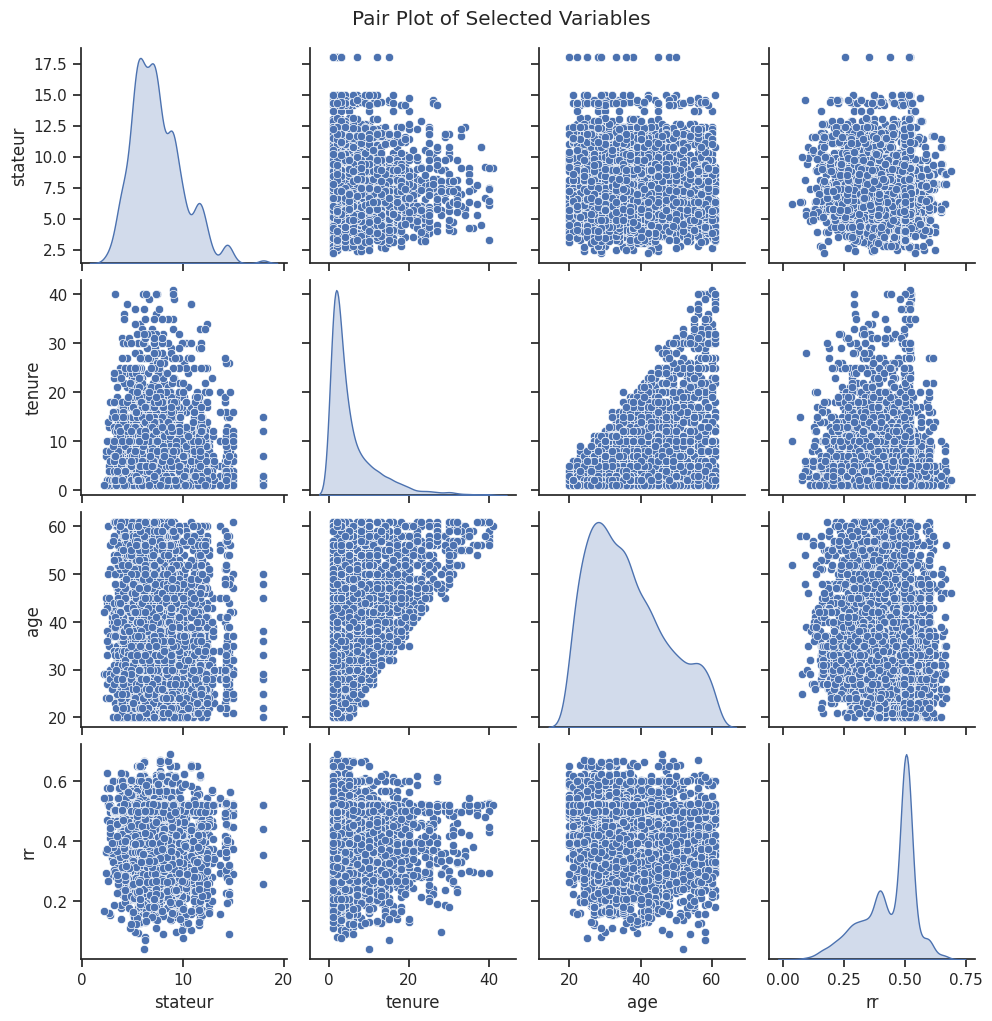

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for selected variables
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['stateur', 'tenure', 'age', 'rr']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

### 2. Pair Plot with Regression Lines

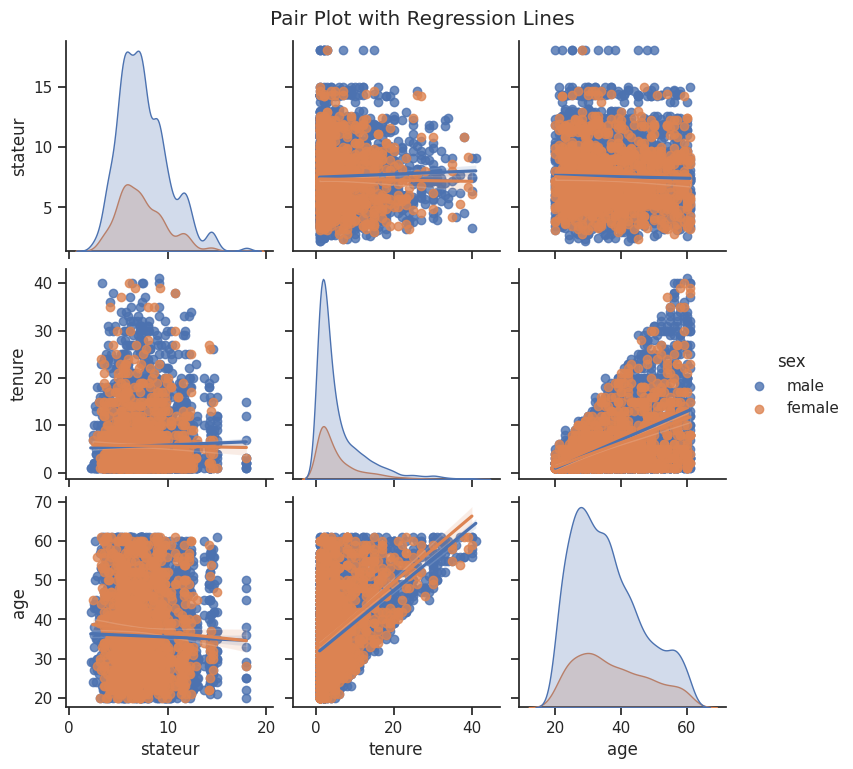

In [12]:
# Pair plot with regression lines
sns.pairplot(data, vars=['stateur', 'tenure', 'age'], kind='reg', hue='sex')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()

### 3. Complete Correlation Analysis

In [13]:
# Calculating correlation for numerical columns
correlation_all = data.corr(method='pearson', numeric_only=True)
correlation_all


,rownames,stateur,statemb,state,age,tenure,yrdispl,rr
rownames,1.000000,0.038567,-0.048954,-0.011454,-0.001671,0.012278,-0.079291,0.014312
stateur,0.038567,1.000000,-0.242386,0.129843,-0.035420,0.022494,-0.524923,-0.086565
statemb,-0.048954,-0.242386,1.000000,-0.186118,0.021088,0.008032,0.607808,0.270023
state,-0.011454,0.129843,-0.186118,1.000000,-0.050537,-0.107097,-0.065680,-0.188103
age,-0.001671,-0.035420,0.021088,-0.050537,1.000000,0.486453,0.047242,-0.125424
tenure,0.012278,0.022494,0.008032,-0.107097,0.486453,1.000000,-0.023060,-0.145108
yrdispl,-0.079291,-0.524923,0.607808,-0.065680,0.047242,-0.023060,1.000000,0.072308
rr,0.014312,-0.086565,0.270023,-0.188103,-0.125424,-0.145108,0.072308,1.000000


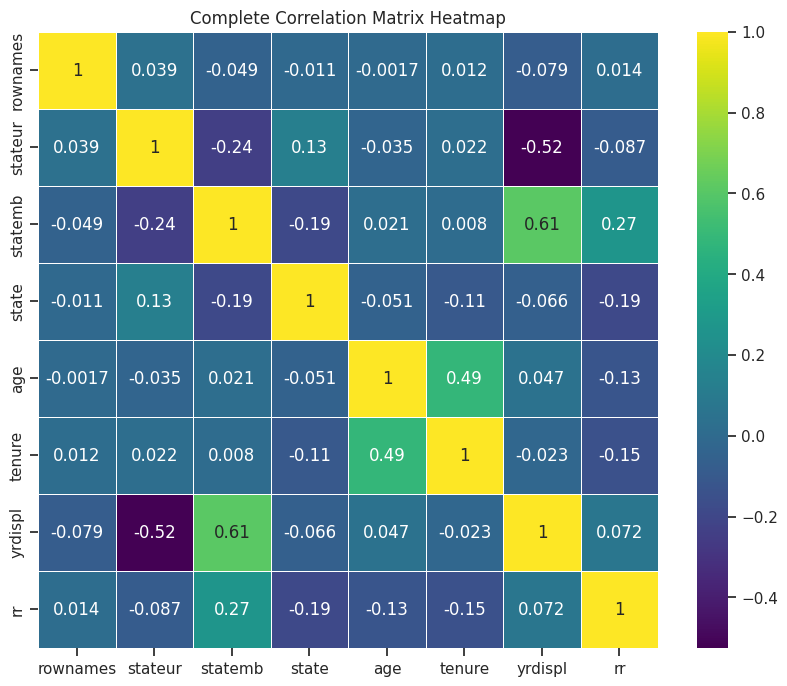

In [14]:
# Plotting heatmap for complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()

## Time Series Analysis (Synthetic Time Index)

## Overview
This section covers Time Series Analysis (TSA) using a synthetic time index.

### 1. Creating a Synthetic Time Index

In [15]:
# Creating a synthetic time index
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Displaying the first few rows with synthetic time index
data.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
time_index,,,,,,,,,,,,,,,,,,,
2020-01-01,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
2020-01-02,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2020-01-03,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
2020-01-04,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
2020-01-05,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


### 2. Basic Time Series Plot

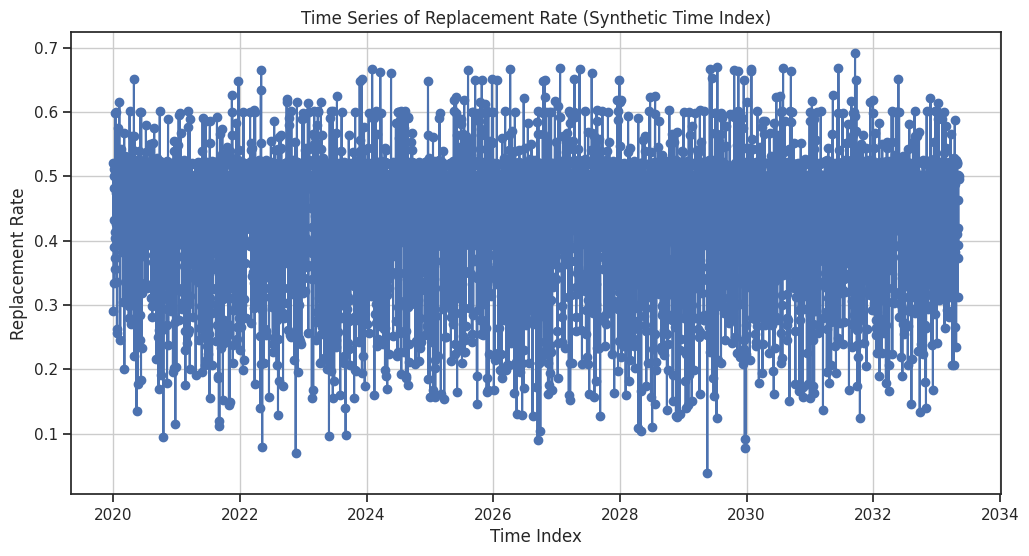

In [16]:
# Basic time series plot of 'rr' (replacement rate)
plt.figure(figsize=(12, 6))
plt.plot(data['rr'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Replacement Rate (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Replacement Rate')
plt.grid(True)
plt.show()

### 3. Resampling and Rolling Mean Analysis

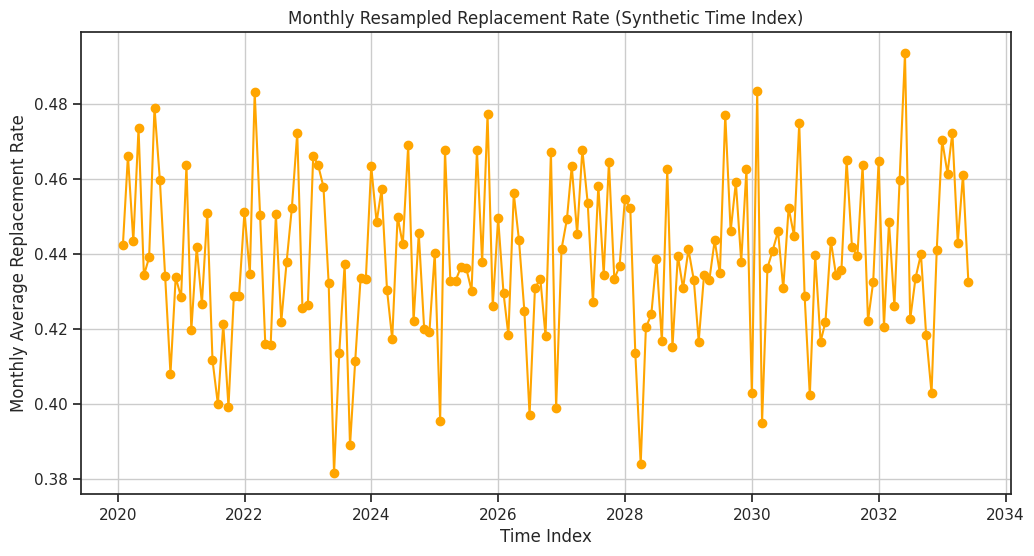

In [17]:
# Resampling the data to monthly frequency and calculating mean
monthly_rr = data['rr'].resample('M').mean()

# Plotting the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_rr, marker='o', color='orange')
plt.title('Monthly Resampled Replacement Rate (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average Replacement Rate')
plt.grid(True)
plt.show()

### 4. Rolling Statistics for Trend Analysis

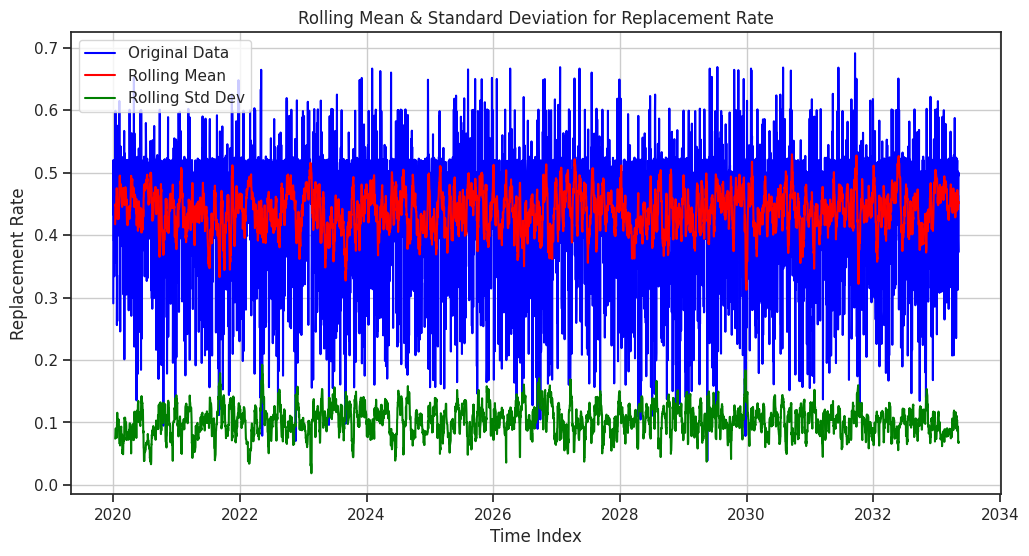

In [18]:
# Calculating rolling mean and standard deviation
rolling_mean = data['rr'].rolling(window=12).mean()
rolling_std = data['rr'].rolling(window=12).std()

# Plotting rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['rr'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation for Replacement Rate')
plt.xlabel('Time Index')
plt.ylabel('Replacement Rate')
plt.legend()
plt.grid(True)
plt.show()

### 5. Seasonal Decomposition

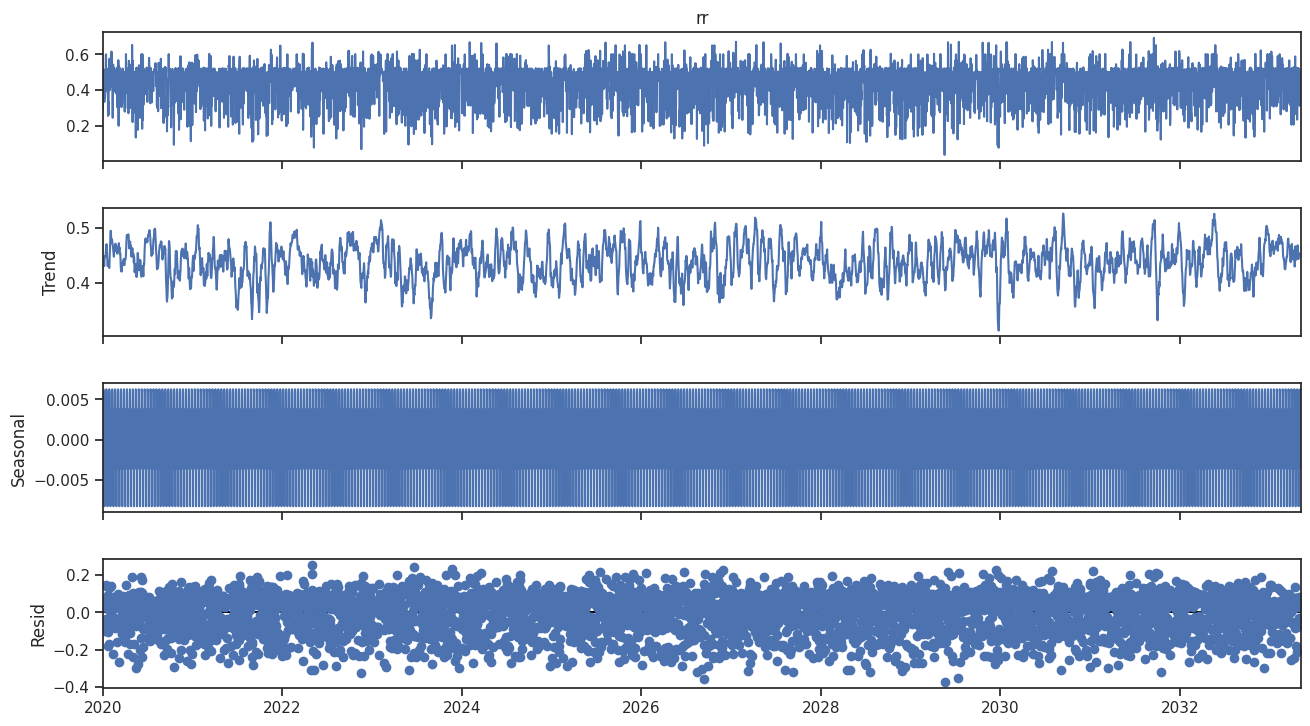

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of time series
decomposition = seasonal_decompose(data['rr'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

## Conclusion
This section presents a comprehensive Time Series Analysis using a synthetic time index, highlighting trends, seasonal patterns, and rolling statistics in the dataset. The analysis emphasizes the fluctuations in article publications over time, providing insights into publishing behavior and patterns.